In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, \
ConfusionMatrixDisplay, silhouette_score, pairwise_distances
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Rows to drop.
to_drop = [""]

# Read Data
data = pd.read_csv("spotify_dataset.csv")

# Remove Desired Labels
for attribute in to_drop:
  data = data.drop(data[data.track_genre == attribute].index)

data = data.truncate(0, 99999)
data.info()
data.head()

genre_count = {}
for genre in data["track_genre"]:
  if genre in genre_count.keys():
    genre_count[genre] += 1
  else:
    genre_count[genre] = 1

print(genre_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             100000 non-null  int64  
 1   track_id          100000 non-null  object 
 2   artists           99999 non-null   object 
 3   album_name        99999 non-null   object 
 4   track_name        99999 non-null   object 
 5   popularity        100000 non-null  int64  
 6   duration_ms       100000 non-null  int64  
 7   explicit          100000 non-null  bool   
 8   danceability      100000 non-null  float64
 9   energy            100000 non-null  float64
 10  key               100000 non-null  int64  
 11  loudness          100000 non-null  float64
 12  mode              100000 non-null  int64  
 13  speechiness       100000 non-null  float64
 14  acousticness      100000 non-null  float64
 15  instrumentalness  100000 non-null  float64
 16  liveness          100

In [ ]:
label_drops = [
    ["index", "track_id", "artists", "album_name", "track_name", \
                  "popularity", "duration_ms", "explicit", "loudness", "time_signature"],
    ["index", "track_id", "artists", "album_name", "track_name", \
                  "popularity", "duration_ms", "explicit", "time_signature"],
    ["index", "track_id", "artists", "album_name", "track_name", \
                  "popularity", "duration_ms", "explicit"],
    ["index", "track_id", "artists", "album_name", "track_name", \
                  "popularity", "duration_ms", "explicit", "loudness",\
      "time_signature", "key"],
    ["index", "track_id", "artists", "album_name", "track_name", \
                  "popularity"],
    ["index", "track_id", "artists", "album_name", "track_name"],
    ["index", "track_id", "artists", "album_name", "track_name", "time_signature"],
    ["index", "track_id", "artists", "album_name", "track_name", \
     "loudness", "duration_ms"],
]

In [ ]:
# Strip unecessary data.
data = data.drop(label_drops[5], axis=1)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        100000 non-null  int64  
 1   duration_ms       100000 non-null  int64  
 2   explicit          100000 non-null  bool   
 3   danceability      100000 non-null  float64
 4   energy            100000 non-null  float64
 5   key               100000 non-null  int64  
 6   loudness          100000 non-null  float64
 7   mode              100000 non-null  int64  
 8   speechiness       100000 non-null  float64
 9   acousticness      100000 non-null  float64
 10  instrumentalness  100000 non-null  float64
 11  liveness          100000 non-null  float64
 12  valence           100000 non-null  float64
 13  tempo             100000 non-null  float64
 14  time_signature    100000 non-null  int64  
 15  track_genre       100000 non-null  object 
dtypes: bool(1), float64(9

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# Separate labels and data
to_predict = "track_genre" # "track_genre" "popularity"
labels = data[to_predict].to_numpy()
unique_labels = np.unique(labels)
print(labels)

# drop the labels from the dataframe and put the cols of data attributes into numpy array
data_points = data

['acoustic' 'acoustic' 'acoustic' ... 'singer-songwriter'
 'singer-songwriter' 'singer-songwriter']


In [ ]:
# Map genre to number.
index_to_genre = {}
genre_to_index = {}
for i, label in enumerate(np.unique(data_points["track_genre"].to_numpy())):
  #print(i, label)
  index_to_genre[i] = label
  genre_to_index[label] = i

if to_predict == "popularity":
  for i, row in enumerate(data_points["track_genre"]):
    data_points.at[i, "track_genre"] = genre_to_index[row]

# drop the labels from the dataframe and put the cols of data attributes into numpy array
data_points = data_points.drop(to_predict, axis=1)
data_points = data_points.to_numpy()
print(labels)

['acoustic' 'acoustic' 'acoustic' ... 'singer-songwriter'
 'singer-songwriter' 'singer-songwriter']


In [ ]:
# Split data

# X_train: the train data points
# X_test: the test data points
# y_train: the labels for the train points
# y_test: the labels for the test points
x_train, x_test, y_train, y_test = train_test_split(data_points,
                                                    labels,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=labels)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train)

[[-0.09208941  0.64517487 -0.31640166 ... -0.62226164  0.44992108
   0.21950358]
 [ 0.92398157  0.10228013 -0.31640166 ... -0.94514242 -1.11973869
   0.21950358]
 [-1.46157637 -0.83630307 -0.31640166 ...  0.14798409 -0.0876502
   0.21950358]
 ...
 [ 0.39385758 -0.26889129 -0.31640166 ... -0.05430267 -0.69487368
   0.21950358]
 [-0.4896824  -0.6280171  -0.31640166 ... -0.42775514  0.98567885
   0.21950358]
 [-1.01980638 -1.38563223 -0.31640166 ...  0.17132487  1.02077362
   0.21950358]]


In [ ]:
# MLP
models = []
#models.append(MLPClassifier((300,200,100), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.001).fit(x_train, y_train))
#models.append(MLPClassifier((300,200,100), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.001, activation="logistic").fit(x_train, y_train))
#models.append(MLPClassifier((300,300,300), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.001).fit(x_train, y_train))
#models.append(MLPClassifier((300,200,100), max_iter=15000, learning_rate="adaptive", random_state=42, learning_rate_init=0.001).fit(x_train, y_train))
#models.append(MLPClassifier((300,200,100), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.002).fit(x_train, y_train))
#models.append(MLPClassifier((300,200,100), max_iter=10000, learning_rate="constant", random_state=42, learning_rate_init=0.001).fit(x_train, y_train))
# Combine best performers.
#models.append(MLPClassifier((300,300,300), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.002, activation="logistic").fit(x_train, y_train))
#models.append(MLPClassifier((300,300,300,300), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.002, activation="logistic").fit(x_train, y_train))
models.append(MLPClassifier((500,400,300), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.002, activation="logistic").fit(x_train, y_train))
#models.append(MLPClassifier((500,400,300), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.002, activation="identity").fit(x_train, y_train))
#models.append(MLPClassifier((500,400,300), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.002, activation="tanh").fit(x_train, y_train))
#models.append(MLPClassifier((500,400,300), max_iter=10000, learning_rate="adaptive", random_state=42, learning_rate_init=0.002, activation="relu").fit(x_train, y_train))

In [ ]:
# Predict
predictions = []

for model in models:
  predictions.append(model.predict(x_test))

In [ ]:
display_ith = 0

Model 0 Accuracy: 0.272


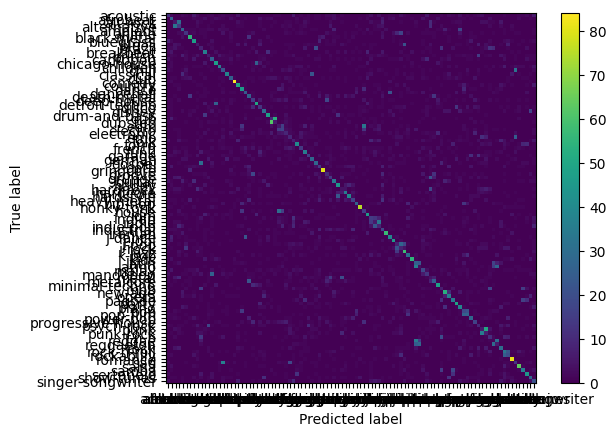

<Figure size 20000x20000 with 0 Axes>

In [ ]:
# Display
if (display_ith >= len(predictions)):
  display_ith = 0

print(f"Model {display_ith} Accuracy: {np.mean(predictions[display_ith] == y_test)}")
display = ConfusionMatrixDisplay.from_predictions(y_test, predictions[display_ith], include_values = False)
plt.figure(figsize=(200, 200))

display_ith += 1